## Lunch and Learn - Python Automation

### Import libraries

In [4]:
import pandas as pd
import datetime #To control dates
import numpy as np #Useful for arrays and functions
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [5]:
from IPython.display import Image #In order to upload images to the notebook.

### Press Tab after a dot to see what the library contains

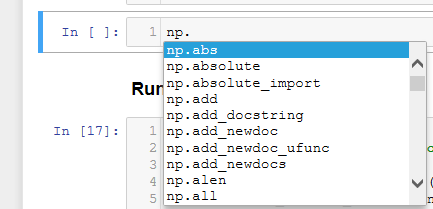

In [37]:
Image(filename='C:\Users\G53283\Desktop\Lunch & Learn\Tap example.png')

### When initializing function, put the cursor in the middle of the brackets and press Shift + Tab to get info

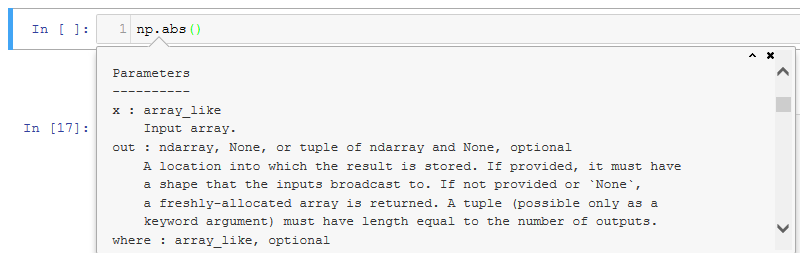

In [38]:
Image(filename='C:\Users\G53283\Desktop\Lunch & Learn\Inf.png')

## Common Python code

In [54]:
2+2

4

In [58]:
x = 4 * 4

In [59]:
print(x)

16


### Looping

In [4]:
for i in range(0,10):
    print(i)

0
1
2
3
4
5
6
7
8
9


In [94]:
names = ['Jesper','Mads','Panu','Alexandra','Mathias']

for i in names:
    print('Happy New Year: '+i)

Happy New Year: Jesper
Happy New Year: Mads
Happy New Year: Panu
Happy New Year: Alexandra
Happy New Year: Mathias


In [45]:
x = 0

while x < 5:
    print('Hello Nordea')
    x+=1

Hello Nordea
Hello Nordea
Hello Nordea
Hello Nordea
Hello Nordea


In [46]:
func = lambda x: x*2

In [48]:
for i in range(0,5):
    print(func(i))

0
2
4
6
8


In [88]:
new_data = []

for i in range(0,5):
    new_data.append(i)

In [89]:
new_data

[0, 1, 2, 3, 4]

In [90]:
min(new_data)

0

In [91]:
max(new_data)

4

### Conditional Statements

In [79]:
5 == 5

True

In [81]:
5 > 6

False

In [78]:
x = 8

if x > 4:
    print('True')
else:
    print('False')

True


In [87]:
x = 6

if x > 4 and x < 10 :
    print('True')
else:
    print('False')

True


In [98]:
if 'ana' in 'banana':
    print('Nice')

Nice


In [99]:
if 'apple' not in 'banana':
    print('Too bad')

Too bad


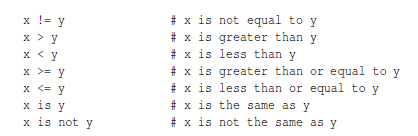

In [82]:
Image(filename='C:\Users\G53283\Desktop\Lunch & Learn\statements.png')

### Slicing

In [8]:
names[0]

'Jesper'

In [9]:
names[-1]

'Mathias'

In [10]:
len(names)

5

In [11]:
names[::-1]

['Mathias', 'Alexandra', 'Panu', 'Mads', 'Jesper']

## Jupyter interactive

In [53]:
h = raw_input('input your value ')

input your value 100


In [67]:
print(h)

100


In [85]:
name = raw_input('What is your name?\n')

What is your name?
Jesper


In [86]:
print(name)

Jesper


In [83]:
name = raw_input('Enter file:')
handle = open(name, 'r')
text = handle.read()

Enter file:C:\Users\G53283\Desktop\REPO.txt


In [84]:
text

'Correction to CHF repo ON with Rene Hansen. Correction to DKK GOV and MORT ON TN with Dan Knudsen.  And correction to SEK GOV and MORT ON with Dan Knudsen. '

In [92]:
while True:
    line = raw_input('> ')
    if line == 'done':
        break
    print (line)
print ('Done!')

> done
Done!


In [104]:
import os #stands for operating system
cwd = os.getcwd() #current dicrectory
print cwd

C:\Users\G53283


In [105]:
os.path.abspath('REPO.txt')

'C:\\Users\\G53283\\REPO.txt'

### Read in Data quickly with use of your clipboard

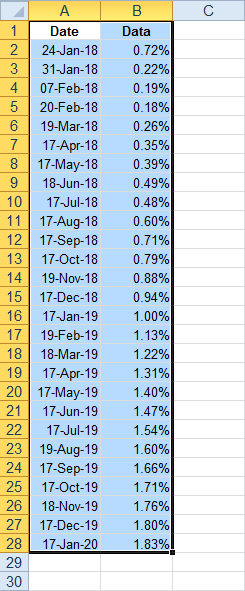

In [26]:
Image(filename='C:\Users\G53283\Desktop\Lunch & Learn\Data.png')

In [33]:
df = pd.read_clipboard()
df

,Date,Data
0,24-Jan-18,0.7185
1,31-Jan-18,0.2189
2,07-Feb-18,0.1929
3,20-Feb-18,0.1841
4,19-Mar-18,0.2608
5,17-Apr-18,0.3520
6,17-May-18,0.3908
7,18-Jun-18,0.4895
8,17-Jul-18,0.4785
9,17-Aug-18,0.6046


In [34]:
df.head()

,Date,Data
0,24-Jan-18,0.7185
1,31-Jan-18,0.2189
2,07-Feb-18,0.1929
3,20-Feb-18,0.1841
4,19-Mar-18,0.2608


In [35]:
df.tail()

,Date,Data
22,17-Sep-19,1.6566
23,17-Oct-19,1.7068
24,18-Nov-19,1.7555
25,17-Dec-19,1.7959
26,17-Jan-20,1.8350


In [100]:
df['Timestwo']  = df['Data'] * 2

In [101]:
df.head()

,Date,Data,Timestwo
0,24-Jan-18,0.7185,1.4370
1,31-Jan-18,0.2189,0.4378
2,07-Feb-18,0.1929,0.3858
3,20-Feb-18,0.1841,0.3682
4,19-Mar-18,0.2608,0.5216


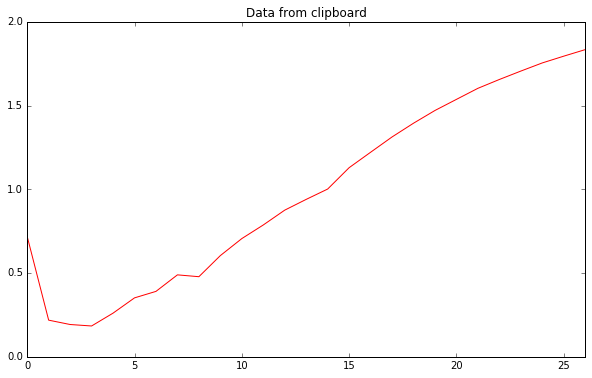

In [102]:
df['Data'].plot(figsize=(10,6), color='red', title='Data from clipboard')

### Run SQL

In [17]:
from marvin import marvin_cfg
from pandas.tseries.offsets import BDay

twp = marvin_cfg.get_connection('twp') #get connection to TWP
trmp = marvin_cfg.get_connection('trmp') #get connection to TRMP

Today = datetime.datetime.today().strftime("%d-%m-%y")
Yesterday_B = (datetime.datetime.today()-BDay(1)).strftime("%d-%m-%y")

#### Read SQL

In [18]:
df = pd.read_sql("""select fa_date, contract, strike, maturity, portfolio, data, vega, pl_vega, spread, bid, ask, mid, fa
from fcuser.ibcno_voltool_log 
where fa_date = TO_DATE('"""+Today+"""','DD/MM/YY')
and abs(PL_VEGA) >= 10000
and abs((mid- fa)) > 0.01
and abs((mid- fa)) / spread > 1
and data <> 'Parameterization'
and spread <> 0
""", trmp)

df

,fa_date,contract,strike,maturity,portfolio,data,vega,pl_vega,spread,bid,ask,mid,fa
0,2018-01-16,IYRUP19A80,80,43483,SEDT DEVON,Market data,32873.507086,50046.142989,0.00909,0.143785,0.152875,0.14833,0.133106


#### Save SQL result to Excel sheet

In [20]:
df.to_excel(r'H:\My documents\EXAMPLE.xlsx') #write the dataframe to excel
df.to_csv(r'H:\My documents\EXAMPLE.csv') #write the dataframe to csv

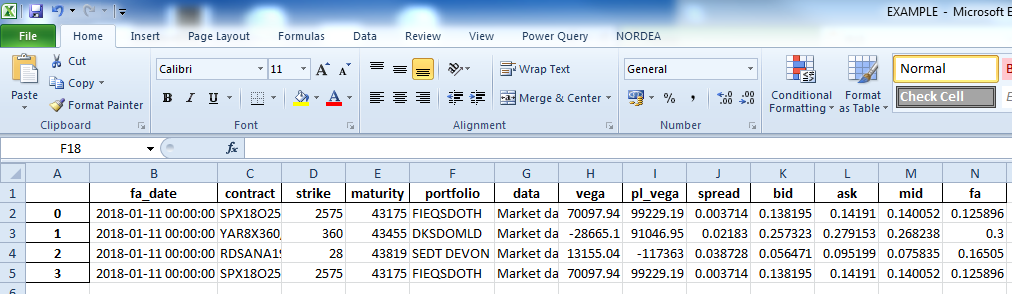

In [50]:
Image(filename='C:\Users\G53283\Desktop\Lunch & Learn\Excel example.png')

#### Read the Saved result into Python from your csv and excel file

In [22]:
df1 = pd.read_excel(r'H:\My documents\EXAMPLE.xlsx') #write the dataframe to excel
df2 = pd.read_csv(r'H:\My documents\EXAMPLE.csv') #write the dataframe to csv

In [23]:
df1

,fa_date,contract,strike,maturity,portfolio,data,vega,pl_vega,spread,bid,ask,mid,fa
0,2018-01-16,IYRUP19A80,80,43483,SEDT DEVON,Market data,32873.507086,50046.142989,0.00909,0.143785,0.152875,0.14833,0.133106


#### Execute a SQL script

In [17]:
twp.execute("""DECLARE       
     P_DATE DATE;       
     P_GLOGON VARCHAR2(200);    
     BEGIN       
     P_DATE := TO_DATE('"""+Yesterday_B+"""','DD/MM/YY');
     P_GLOGON := 'G53283';       
     IPV.PKG_IPV_EQUITY.load_equity_t1 (  P_DATE => P_DATE,P_GLOGON => P_GLOGON) ;  
     END;""")

### Interact with other programs

In [40]:
import win32com.client as win32
from win32com.client import Dispatch
import pyautogui
import time

shell = win32.Dispatch("WScript.Shell") #Open Shell
shell.Run("notepad") #Open Notepad
time.sleep(2)
shell.AppActivate("Notepad") #Run Notepad

True

#### Open Google Chrome

In [41]:
shell = win32.Dispatch("WScript.Shell") #Open Shell
shell.Run("Chrome") #Open Chrome
time.sleep(1) #Sleep in order to get the computer to catch up
shell.AppActivate("Chrome") #Activate Chrome

True

#### Use win32 to send keys and pyautogui to control mouse and type string

In [126]:
shell = win32.Dispatch("WScript.Shell") #Open Shell
shell.Run("Chrome") #Open Chrome
time.sleep(1) #Sleep in order to get the computer to catch up
shell.AppActivate("Chrome") #Activate Chrome

win = pyautogui.getWindow('Chrome') #Get Chrome window
win.maximize() #Maximize
win.move(0, 0) #Move to corner
win.set_foreground() #Maximize

time.sleep(0.5)
pyautogui.moveTo(382, 51) #Move mouse
time.sleep(0.5)
pyautogui.click() #Click Mouse
time.sleep(0.5)
shell.SendKeys("^a", 0) #Select all -> Ctrl + A
time.sleep(0.5)
shell.SendKeys("{DEL}", 0) #Delete
time.sleep(0.5)
pyautogui.typewrite("http://www.nordea.se/privat/sparande/fonder/fondutbud.html") #Type into browser
time.sleep(1)
shell.SendKeys("{ENTER}") #Press Enter

#### Might be better way due to you can control while shell is Busy

In [125]:
import win32api 

shell = win32.Dispatch("InternetExplorer.Application") #Open Shell
shell.Visible = 1
shell.FullScreen = 0
shell.Navigate('http://www.nordea.se/privat/sparande/fonder/fondutbud.html')

while shell.Busy == True:
    win32api.Sleep(100)

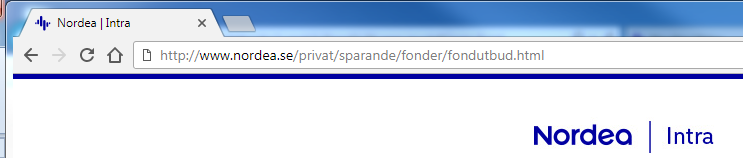

In [60]:
Image(filename='C:\Users\G53283\Desktop\Lunch & Learn\Chrome example.png')

#### Open Excel

In [127]:
shell.Run("Excel")
time.sleep(1) #Sleep in order to get the computer to catch up
shell.AppActivate("Excel") #Activate Chrome
win = pyautogui.getWindow('Excel') #Get window
win.maximize() #Maximize
win.move(0, 0) #Move to corner
win.set_foreground()

#### Open Excel files with Ctrl + O by using Sendkeys when the excel sheet is open

In [42]:
win = pyautogui.getWindow('Excel') #Get window
win.maximize() #Maximize
win.move(0, 0) #Move to corner
win.set_foreground()
time.sleep(5) #In order to get Excel to start
shell.SendKeys("^o", 0) #Ctrl Open

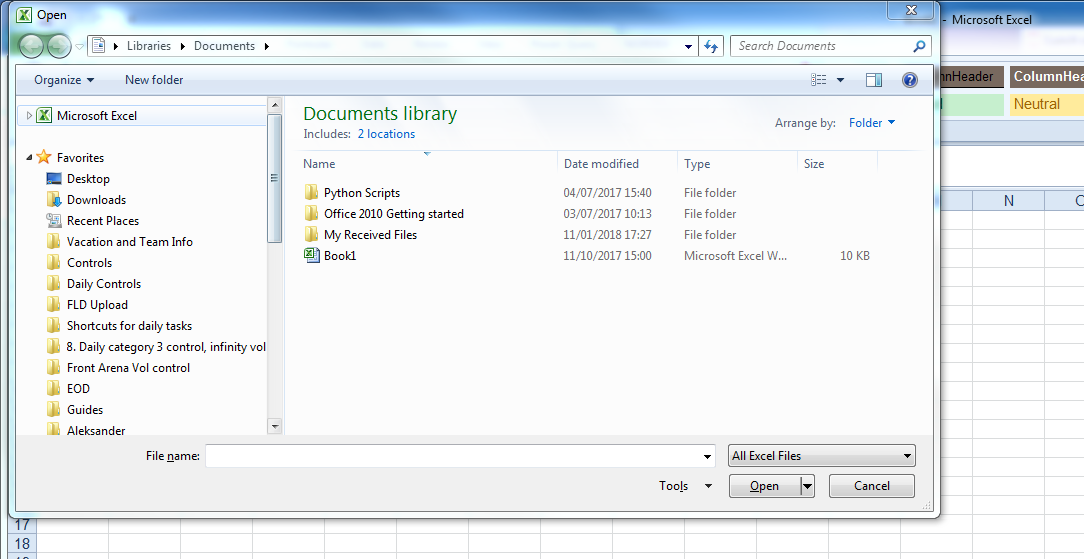

In [43]:
Image(filename='C:\Users\G53283\Desktop\Lunch & Learn\open.png')

### Interact with Excel with openpyxl, win32com.client or xlwings all have pros and cons

In [128]:
import openpyxl

wb = openpyxl.load_workbook(r'H:\Book1.xlsx') #load workbook
ws = wb.active #active it

ws['A1'].value = 200
ws['A2'].value = 300
ws['A3'].value = '=SUM(A1:A2)'

wb.save(r'H:\Book1.xlsx')  #remember to save the changes

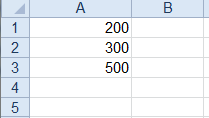

In [35]:
Image(filename='C:\Users\G53283\Desktop\Lunch & Learn\Excel cal.png')

### Store an excel value into a python variable

In [70]:
#Store excel value into python variable
wb = openpyxl.load_workbook(r'H:\Book1.xlsx') #load workbook
ws = wb.active

result = ws['A1'].value

print(result)

200


### Work with Ranges, win32client is very VBAish

In [131]:
import win32com.client as win32

excel = win32.gencache.EnsureDispatch('Excel.Application')

wb = excel.Workbooks.Add()
ws = wb.Worksheets("Sheet1")

ws.Cells(1,1).Value = "Cell A1"
ws.Cells(1,1).Offset(2,4).Value = "Cell D2"

ws.Range("A2").Value = "Cell A2"
ws.Range("A3:B4").Value = "A3:B4"

ws.Range("A6:B7,A9:B10").Value = "A6:B7,A9:B10"

wb.SaveAs('ranges_and_offsets.xlsx')
excel.Application.Quit()

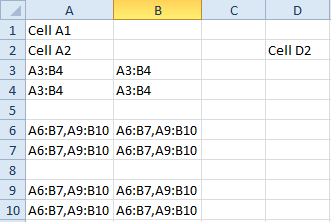

In [133]:
Image(filename=r'C:\Users\G53283\Desktop\Lunch & Learn\ranges.png')

In [2]:
import win32com.client as win32

excel = win32.gencache.EnsureDispatch('Excel.Application')

wb = excel.Workbooks.Add()
ws = wb.Worksheets("Sheet1")

for i in range(1,10):
    ws.Cells(1,i).Value = i

wb.SaveAs('loops.xlsx')
excel.Application.Quit()

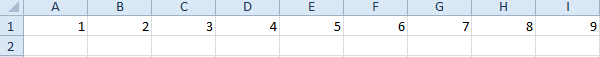

In [6]:
Image(filename=r'C:\Users\G53283\Desktop\Lunch & Learn\loops.png')

### Work with Colors

In [134]:
import win32com.client as win32

excel = win32.gencache.EnsureDispatch('Excel.Application')

wb = excel.Workbooks.Add()
ws = wb.Worksheets("Sheet1")

for i in range (1,21):
    ws.Cells(i,1).Value = i
    ws.Cells(i,1).Interior.ColorIndex = i

wb.SaveAs('cell_color.xlsx')
excel.Application.Quit()

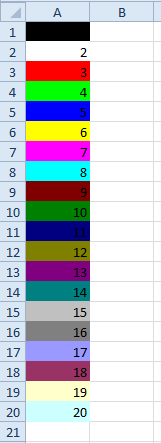

In [135]:
Image(filename=r'C:\Users\G53283\Desktop\Lunch & Learn\colors.png')

### Work with Formats

In [136]:
import win32com.client as win32
excel = win32.gencache.EnsureDispatch('Excel.Application')

wb = excel.Workbooks.Add()
ws = wb.Worksheets("Sheet1")

for i,font in enumerate(["Arial","Courier New","Garamond","Georgia","Verdana"]):
    ws.Range(ws.Cells(i+1,1),ws.Cells(i+1,2)).Value = [font,i+i]
    ws.Range(ws.Cells(i+1,1),ws.Cells(i+1,2)).Font.Name = font
    ws.Range(ws.Cells(i+1,1),ws.Cells(i+1,2)).Font.Size = 12+i

ws.Range("A1:A5").HorizontalAlignment = win32.constants.xlRight

ws.Range("B1:B5").NumberFormat = "$###,##0.00"

ws.Columns.AutoFit()

wb.SaveAs('format_cells.xlsx')
excel.Application.Quit()

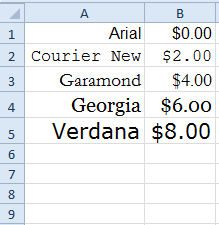

In [137]:
Image(filename=r'C:\Users\G53283\Desktop\Lunch & Learn\formats.png')

### VBA vs win32client

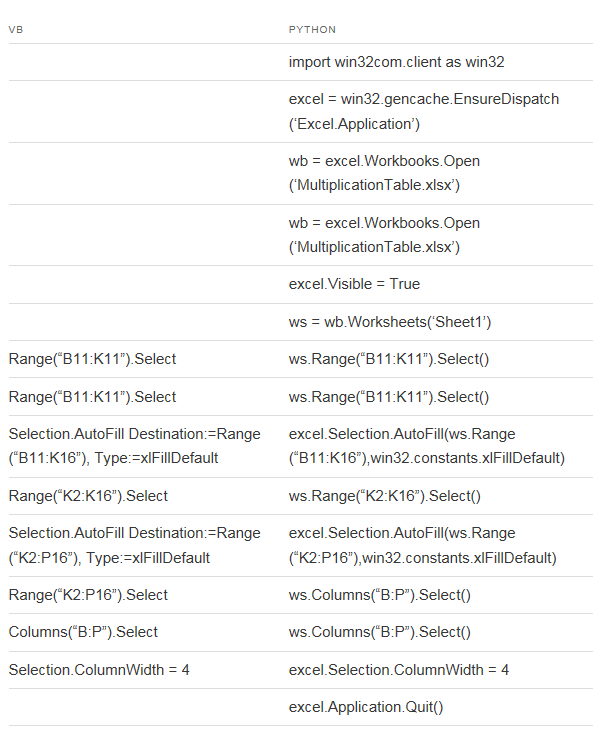

In [7]:
Image(filename=r'C:\Users\G53283\Desktop\Lunch & Learn\vba.png')

### Refresh Excel Sheet without seeing eg. Visible = 0

In [58]:
import win32com.client

Application = win32com.client.Dispatch("Excel.Application")
Application.Visible = 0 #Set to 1 if you want to see the sheet - like VBAs screen updating

Workbook = Application.Workbooks.Open(r'H:\Book1.xlsx')
Workbook.RefreshAll()
Workbook.Save()

Application.Quit()

### Write VBA Code From Python

In [10]:
from win32com.client import DispatchEx

vba =  """
Sub Hello()

Range("A1:A2").value = 1

End Sub
"""

xl = DispatchEx('Excel.Application')
wb = xl.Workbooks.Add('H:\Book1.xlsx')

mod = wb.VBProject.VBComponents.Add(1)
mod.CodeModule.AddFromString(vba)

xl.Run('Hello')
wb.SaveAs('H:\Book1111.xlsm',FileFormat=52)
xl.Quit()

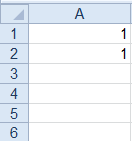

In [13]:
Image(filename='C:\Users\G53283\Desktop\Lunch & Learn\VBA example.png')

### Run VBA Code From Python with xlwings

In [95]:
import xlwings
wb = xlwings.Book('Q:\$PC_Global_Rates\RPO & MD\Market Data\Valuation\Daily Controls\FLD Upload\FLD macro.xlsm')
macro = wb.macro('sbDelete_Rows_IF_Cell_Is_Blank') #name of the macro
macro.run()

### Display or Send Email

In [68]:
import win32com.client as win32

outlook = win32.Dispatch('outlook.application') #open outlook
mail = outlook.CreateItem(0) #create new mail
mail.To = 'm.karlsson@nordea.com'
mail.Cc = 'PC GR Curves'
mail.Subject = 'Equity T+1'
mail.HTMLBody = 'Hello Martin'
mail.display()

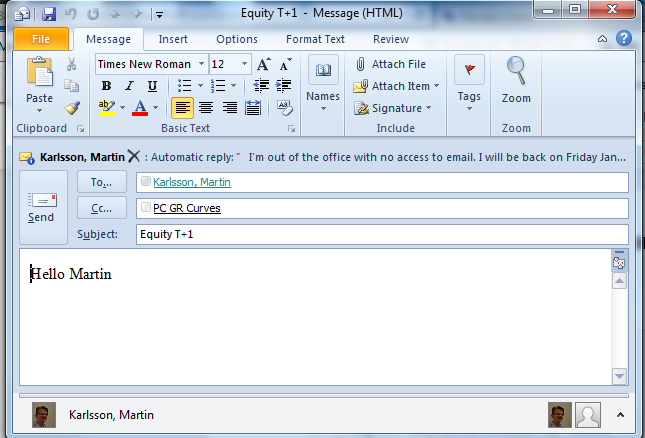

In [9]:
Image(filename='C:\Users\G53283\Desktop\Lunch & Learn\Email example.png')

In [39]:
outlook = win32.Dispatch('outlook.application')
mail = outlook.CreateItem(0)
mail.To = 'm.karlsson@nordea.com'
mail.Cc = 'PC GR Curves'
mail.Subject = 'Equity T+1 '+Yesterday_B
mail.HTMLBody = """\
<html>
  <head></head>
  <body>
    <p>Hi,<br>
    <br>
       The following equities breached the EUR 50,000 threshold in terms of IPV variance:<br>
       <br>
    </p>
  </body>
</html>
"""
mail.HTMLBody += df.to_html(na_rep = "", index = False).replace('<th>','<th style = "background-color: navy; font-size:10pt;">').replace('<tbody>', '<tbody style = "font-size:10pt; text-align: center;">')                                                              
mail.display()

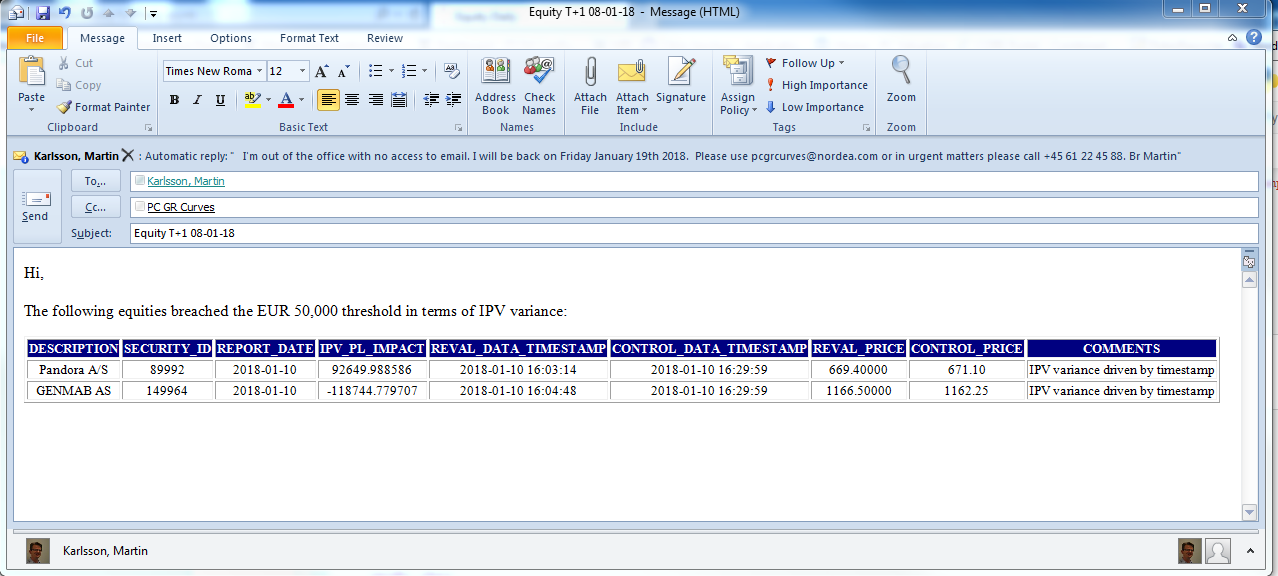

In [11]:
Image(filename='C:\Users\G53283\Desktop\Lunch & Learn\Email example 2.png')

## Build a Robot with pyautogui

# Other

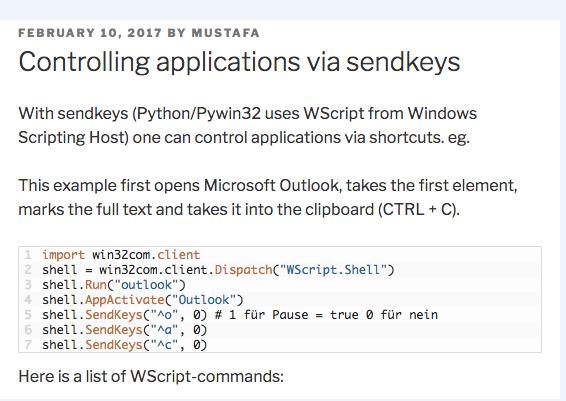

In [59]:
Image(filename='C:\Users\G53283\Desktop\Lunch & Learn\Keys.png')

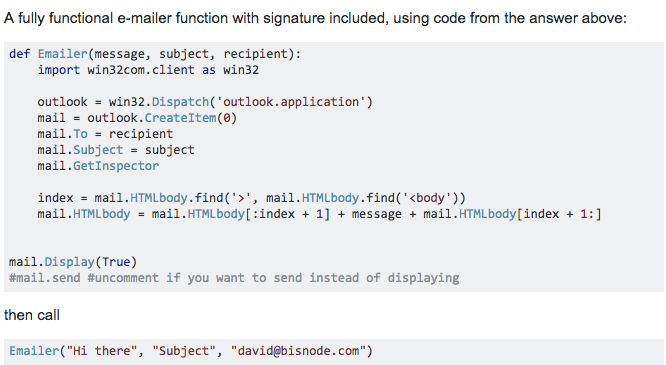

In [60]:
Image(filename='C:\Users\G53283\Desktop\Lunch & Learn\e function.png')

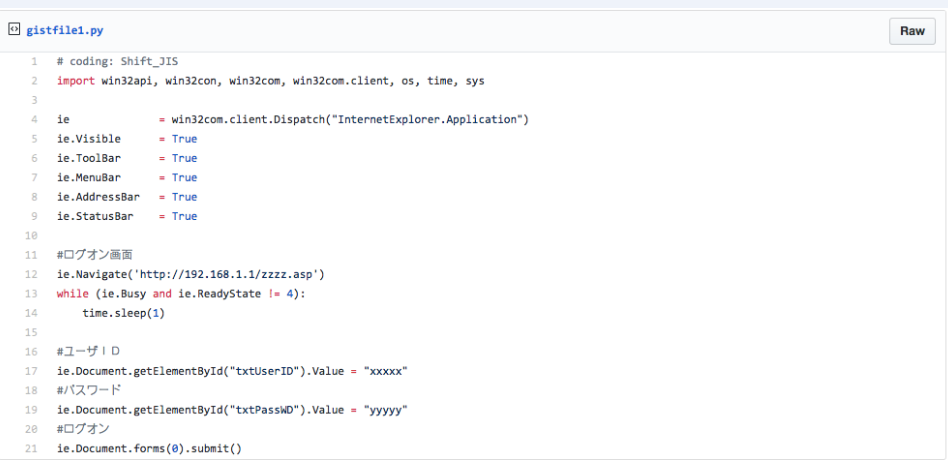

In [115]:
Image(filename=r'C:\Users\G53283\Desktop\Lunch & Learn\scrape.png')

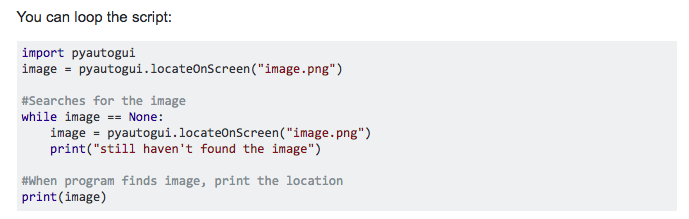

In [36]:
Image(filename=r'C:\Users\G53283\Desktop\Lunch & Learn\pyauto.png')

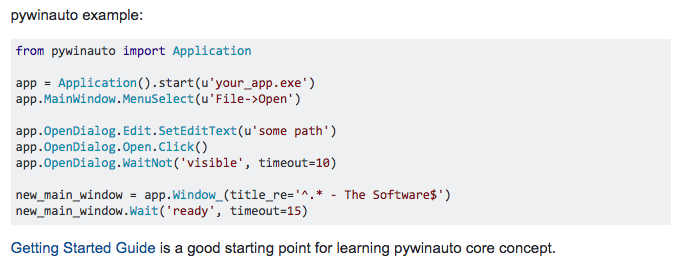

In [38]:
Image(filename=r'C:\Users\G53283\Desktop\Lunch & Learn\pywinauto.png')